In [12]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon, Rectangle, Arc
from mplbasketball import Court
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv("../data/Stephen_Curry_clutch.csv")
df


,MINUTES_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG
0,2,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,20,121,162,1
1,1,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-125,134,1
2,0,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-7,1,1
3,0,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-5,15,1
4,1,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,19,-123,145,1
...,...,...,...,...,...,...,...,...,...,...,...
2200,3,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-71,243,0
2201,0,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,24,-45,242,0
2202,3,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,43,255,0
2203,1,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,27,190,200,0


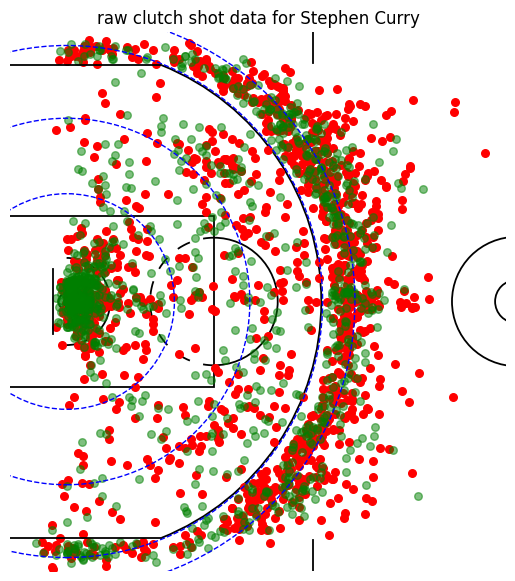

In [ ]:
court_nba = Court(court_type="nba", units="ft", origin="center")

fig, ax = plt.subplots(figsize=(10, 7))
court_nba.draw(ax=ax)
ax.set_xlim(left= -47,right=-1)
ax.set_ylim(bottom=-25,top=25)

df["LOC_X_ft"] = df["LOC_X"]/10
df["LOC_Y_ft"] = df["LOC_Y"]/10

df["LOC_X_ADJUSTED"] = df["LOC_Y_ft"] - 41.75
df["LOC_Y_ADJUSTED"] = df["LOC_X_ft"]

made_shots = df[df["SHOT_MADE_FLAG"] ==1]
missed_shots = df[df["SHOT_MADE_FLAG"] ==0]
ax.set_aspect('equal')
ax.scatter(missed_shots["LOC_X_ADJUSTED"], missed_shots["LOC_Y_ADJUSTED"], c='red', s=30)
ax.scatter(made_shots["LOC_X_ADJUSTED"], made_shots["LOC_Y_ADJUSTED"], c='green', s=30, alpha = 0.5)


ax.set_title("raw clutch shot data for Stephen Curry")
plt.show()
